# Answers to exercises

In [1]:
# Import the usual stuff first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# We'll need this too
import logomaker
import os.path 
from scipy.signal import convolve

This course will include a variety of exercises to increase your Python skills. Note that the knowledge needed to complete each exercise will NOT necessarily have been presented or discussed. If you find yourself at sea, **the first thing you should do is Google your question.** This is how 99% of programming is done.

## 1_introduction.ipynb

**E1.1**: Create a markdown cell containing a bulleted list, a numbred list, and a table.

\# Answer

Bulleted list:
- item A
- item B
- item C

Numbered list:
1. item A
1. item B
1. item C

Table:

| 1 | 2 | 3 |
| - | - | - |
| a | b | c |
| d | e | f |
| g | h | i |

**E1.2**: Plot $y = x^2$ and $y = e^x$ on the same plot, with $x$ ranging from -3 to 3.

In [ ]:
# Answer

x = np.arange(-3,3,0.01)
y1 = x**2                
y2 = np.exp(x)                
plt.plot(x, y1)
plt.plot(x, y2)

**E1.3**: Using the command line, print the first 100 lines of the file `data/old_BindingSiteSet.txt`

In [ ]:
# Answer

!head -n 100 old_BindingSiteSet.txt

## 2_datatypes.ipynb

Here is the DNA sequence of the multiple cloning site (MCS) on the plasmid [pcDNA5](https://www.addgene.org/vector-database/2132/), a popular vector for mammalian gene expression.

In [ ]:
# Note how to define a long string over multiple lines
mcs_seq = 'GAGACCCAAGCTGGCTAGCGTTTAAACTTAAGCTTGGTACCGAGCTCGGATCCACTA' \
          'GTCCAGTGTGGTGGAATTCTGCAGATATCCAGCACAGTGGCGGCCGCTCGAGTCTAG' \
          'AGGGCCCGTTTAAACCCGCTGATCAGCCT'
print(mcs_seq)

**E2.1**: Does this MCS contain a restriction site for NheI (GCTAGC)? How about for MscI (TGGCCA)? 

In [ ]:
# Answer

site_NheI = 'GCTAGC'
site_MscI = 'TGGCCA'

print('NheI: ', site_NheI in mcs_seq)
print('MscI: ', site_MscI in mcs_seq)

**E2.2**: Using the string method `.find()`, find the location(s) of the above restriction sites within the MCS.

In [ ]:
# find site
site_start = mcs_seq.find(site_NheI)
print('site starts at position %d'%site_start)

# check
site_stop = site_start + len(site_NheI)
print('found site: ', mcs_seq[site_start:site_stop])
print('NheI site : ', site_NheI)

**E2.3**: Using the string method `.replace()`, compute the RNA sequence transcribed from the GFP gene sequence (given below). 

In [ ]:
gfp_seq = 'ATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTAGATGGTGATG' \
          'TTAATGGGCACAAATTTTCTGTCAGTGGAGAGGGTGAAGGTGATGCAACATACGGAAAACTTAC' \
          'CCTTAAATTTATTTGCACTACTGGAAAACTACCTGTTCCATGGCCAACACTTGTCACTACTTTC' \
          'GCGTATGGTCTTCAATGCTTTGCGAGATACCCAGATCATATGAAACAGCATGACTTTTTCAAGA' \
          'GTGCCATGCCCGAAGGTTATGTACAGGAAAGAACTATATTTTTCAAAGATGACGGGAACTACAA' \
          'GACACGTGCTGAAGTCAAGTTTGAAGGTGATACCCTTGTTAATAGAATCGAGTTAAAAGGTATT' \
          'GATTTTAAAGAAGATGGAAACATTCTTGGACACAAATTGGAATACAACTATAACTCACACAATG' \
          'TATACATCATGGCAGACAAACAAAAGAATGGAATCAAAGTTAACTTCAAAATTAGACACAACAT' \
          'TGAAGATGGAAGCGTTCAACTAGCAGACCATTATCAACAAAATACTCCAATTGGCGATGGCCCT' \
          'GTCCTTTTACCAGACAACCATTACCTGTCCACACAATCTGCCCTTTCGAAAGATCCCAACGAAA' \
          'AGAGAGACCACATGGTCCTTCTTGAGTTTGTAACAGCTGCTGGGATTACACATGGCATGGATGA' \
          'ACTATACAAATAA'

# Answer here
gfp_rna = gfp_seq.replace('T','U')
gfp_rna

**E2.4**: Create a dictionary called `rc_dict` that maps DNA bases to their complementary bases. I.e., A -> T, C -> G, etc. 

In [ ]:
# Answer
rc_dict = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}

# For example:
rc_dict['A']

In [ ]:
# To compute the reverse complement, we need to create a 'translation table',
# which is also a dictionary, but takes numerical ascii values as keys
# instead of strings
rc_table = str.maketrans(rc_dict)
rc_table

**E2.5**: By passing `rc_table` to the string method `.translate()`, then using indexing with a step of -1, compute the reverse complement of the MCS sequence given above.

In [ ]:
# Compute reverse complement
mcs_seq_rc = mcs_seq.translate(rc_table)[::-1]

# Print forward and RC sequences
print('FW:', mcs_seq)
print('RC:', mcs_seq_rc)

**E2.6**: We have not yet discussed sets. Using Google, figure out what `set` objects are and explain what they represent. In particular, explain why Python evaluates {2,3,3} < {1,2,3} as True.

In [ ]:
# Sets are like lists, but the elements therein don't have a specific order.
# Moreover, each element can occur at most once. 
# So {2,3,3} and {2,3} are the same set. To see this:
print('{2,3,3} == {2,3} is %s.'%({2,3,3} == {2,3}))

# The '<' sign is interpreted as Python as 'is subset'. Because
# {2,3} is a subset of {1,2,3}, this evaluates to true
print('{2,3} < {1,2,3} is %s.'%({2,3} < {1,2,3}))

## 3_flowcontrol.ipynb

Before there were calculators, people had to compute numbers like $\pi$ by hand. This was done by deriving an infinite series expression, then hand-computing the first $N$ terms using standard arithmetic. One way of computing $\pi$ was the **Leibnitz series**:

$$\pi = 4 \left(1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + \cdots \right) = \sum_{n=0}^\infty 4 \frac{(-1)^n}{2n+1}$$

A different way of computing $\pi$ was the **Madhava series**:

$$ \pi = \sqrt{12} \left( 1 - \frac{1}{3 \cdot 3} + \frac{1}{5 \cdot 3^2}  - \frac{1}{7 \cdot 3^3}  + \cdots \right) = \sum_{n=0}^\infty \sqrt{12} \frac{(-1)^n}{(2n+1)\cdot 3^n} $$

We will compare the accuracies of these series in two different ways.

**E3.1**: Using a `for` loop, estimate $\pi$ using the first $10$ terms in both the Liebnitz and Madhava series. Which estimate is more accurate?

In [ ]:
# Answer 

# Initialize both estimates of pi to zero
pi_L = 0
pi_M = 0

# Iterate over n, each time adding the next term to each approximation
for n in range(10):
    pi_L += 4 * (-1)**n / (2*n + 1)
    pi_M += np.sqrt(12) * (-1)**n / ((2*n+1) * 3**n)
    
# Print the results
print('pi_L = %.15f'%pi_L)
print('pi_M = %.15f'%pi_M)
print('pi   = %.15f'%np.pi)
print('The Madhava series is far more accurate')

**E3.2**: Write a function that computes the Leibnitz series for $\pi$ to a specified number of terms. Include a docstring and checks to make sure the input is sane.

In [ ]:
# Write function here 

def pi_leibnitz(N):
    """
    Computes the Liebnitz series for pi to N terms. 
    N must be an int >= 0.
    """
    
    # Check input
    assert isinstance(N, int), 'N must be an integer'
    assert N >= 0, 'N must be positive'
    
    # Compute terms
    ns = np.arange(N)
    terms = 4*((-1)**ns / (2*ns+1))
    approx = terms.sum()
    
    # Return estimte to user
    return approx

# To check that this is working
for N in [1, 10, 100, 1000]:
    print('pi_leibnitz(%d) = %.10f'%(N,pi_leibnitz(N)))

In [ ]:
# Check that the docstring works
pi_leibnitz?

In [ ]:
# Check that crazy input is caught
pi_leibnitz(.5)

## 4_tfanalysis.ipynb

In [ ]:
# Cells in 4_tfanalysis.ipynb

# Load dataframe
df = pd.read_csv("BindingSiteSet.txt", sep='\t', comment='#',
                 header=None, usecols=[1,13], names=['tf','site']).dropna()

# Choose a TF
tf = 'CRP'

# Flag which rows in the dataframe have the correct TF name
flags = (df['tf']==tf)

# Grab those rows. To be safe use copy() to make sure that, if we
# alter tf_df, df itself doesn't change
tf_df = df[flags].copy()

# Get list of capitalized sites and replace the 'site' column with this
capitalized_sites = [site.upper() for site in tf_df['site']]
tf_df['site'] = capitalized_sites

# Compute the length of each site and record this in a 'length' column
site_lengths = [len(site) for site in tf_df['site']]
tf_df['length'] = site_lengths

# preview dataframe
tf_df.head()

**E4.1.** Extract the `length` column of `tf_df` as a Series object, then use the `value_counts()` method to get a new Series object that lists number of times each length occurs.

In [ ]:
vc_series = tf_df['length'].value_counts()
vc_series

In [ ]:
tf_df['length'].value_counts().index[0]

**E4.2.** Apparently there are sites of a bunch of different lengths. Use the ```idxmax()``` method on the result above to determine which binding site length is most common.

In [ ]:
target_length = vc_series.idxmax()
target_length

**E4.3.** Remove rows from `tf_df` that do not correspond to the most common length.

In [ ]:
flags = (tf_df['length'] == target_length)
tf_df = tf_df[flags]
tf_df.head()

**E4.4.** Counts logos shown above aren't what people use in publications. Rather, they typically use "information" logos, like the one shown earlier. By making use of the keyword argument  `to_type='information'` in the function `logomaker.alignment_to_matrix()`, create a CRP information logo.

In [ ]:
# Extract the 'site' column from tf_df
sites = tf_df['site']

# Compute information matrix from this list of sites
infomation_mat = logomaker.alignment_to_matrix(sites, to_type='information')

# Visualize information matrix as a sequence logo
logomaker.Logo(infomation_mat)

**E4.4.** Again using the `value_counts()` method, determine how many binding sites there are for each transcription factor.

In [ ]:
df['tf'].value_counts().head(10)

**E4.5.** Fill out the function below so that the user can pass the name of any TF and get list of aligned sites back. Test that it works, e.g. on `tf='FNR'`, by getting a list of sites and making an information logo. Also test that it fails when it is supposed to.

In [ ]:
# Now let's turn this into a function 
def get_tf_sites(tf):
    """
    Returns a list of sites for a specified transcription factor.
    """
   
    # # Load database
    df = pd.read_csv("old_BindingSiteSet.txt", 
                     sep='\t', 
                     comment='#',
                     header=None, 
                     usecols=[1,13], 
                     names=['tf','site'])
    
    # Make sure tf is a string
    assert isinstance(tf, str), 'tf = %s is not a string'%repr(tf)
    
    # Make sure tf is actually in df['tf']
    assert tf in df['tf'].values, 'tf = %s is not in database.'%tf
    
    # Flag which rows in the dataframe have the correct TF name
    flags = (df['tf']==tf)

    # Grab those rows. To be safe use copy() to make sure that, if we
    # alter tf_df, df itself doesn't change
    tf_df = df[flags].copy()
    
    # Remove rows with missing values
    tf_df.dropna(inplace=True)

    # Get list of capitalized sites and replace the 'site' column with this
    capitalized_sites = [site.upper() for site in tf_df['site']]
    tf_df['site'] = capitalized_sites

    # Compute the length of each site and record this in a 'length' column
    site_lengths = [len(site) for site in tf_df['site']]
    tf_df['length'] = site_lengths
    
    # Use the mode() method to compute the most common binding site length
    length_mode = tf_df['length'].mode()[0]

    # Flag rows having sites of the chosen length
    flags = (tf_df['length']==length_mode)

    # Only keep these rows
    tf_df = tf_df[flags]
    
    # Get sequence alignment and return it
    return tf_df['site']

In [ ]:
# Now test that it works
sites = get_tf_sites('NarL')
info_mat = logomaker.alignment_to_matrix(sites, to_type='information')
logomaker.Logo(info_mat)

In [ ]:
# And test that it fails when its supposed to
sites = get_tf_sites('X')

In [ ]:
# And test that it fails when its supposed to
sites = get_tf_sites(-1.2)

## 5_dnareplication.ipynb

In [ ]:
def load_and_smooth_profile(file_name, chrom_we_want, window_bp=6000):
    """
    Load a smooth a replication profile.
    
    Arguments:
        file_name -- name of a bed file containing the data
        chrom_we_want -- chromosome name in Roman numerals: chrI, ..., chrXVI
        window_bp -- length of smoothing window in bp
    
    Returns:
        centers -- location of bin centers along the chromosome
        smooth_reads -- smoothed number of reads in each bin
    """
   
    # Check validity of file
    assert isinstance(file_name,str), 'file_name is not a string.'
    assert os.path.isfile(file_name), 'file %s does not exist'%file_name
    
    # Read file into dataframe 
    df = pd.read_csv(file_name,  
                 names=['chromosome','start','stop','reads'], 
                 delim_whitespace=True, 
                 skiprows=2)
    
    # Check validity of chromosome
    assert isinstance(chrom_we_want, str), 'chrom_we_want is not a string'
    assert chrom_we_want in set(df['chromosome']), \
        'chrom_we_want value %s not found in data frame.'%chrom_we_want
        
    # Check validity of window_bp
    assert isinstance(window_bp, int), "window_bp is not an integer."
    assert window_bp > 0, "nonpositive window_bp value of %d"%window_bp
    
    # Choose rows to look at
    indices = (df['chromosome']==chrom_we_want)
    
    # Extract read_lenght, num_reads and centers
    chr_df = df[indices]
    num_reads = chr_df['reads']
    starts = chr_df['start']
    stops = chr_df['stop']
    centers = 0.5*(starts + stops)
    
    # Create convolution window
    read_length = df.loc[0,'stop'] - df.loc[0,'start'] + 1
    window_size = window_bp//read_length
    window = np.ones(window_size)/window_size
    
    # Smooth read counts
    smooth_reads = convolve(num_reads,window,'same')
    
    # Now return results
    return centers, smooth_reads

In [ ]:
def plot_profile(centers, 
                 smooth_reads,  
                 title='', 
                 kbspacing=200, 
                 color=[0, .5, 1]):
    """
    Plot a replication profile
    
    Arguments:
        centers -- numpy array of bin locations
        smooth_reads -- numpy array of smoothed read counts; same length as centers
        title -- title for plot
        kbspacing -- tick mark spaking in kilobases
        color -- color of plot
    """
    
    assert len(centers)==len(smooth_reads), "centers and smooth_reads are not the same length."
    assert isinstance(title,str), "title is not a string"
    assert isinstance(kbspacing,int), "kbspacing is not an int"
    assert kbspacing > 0, "nonpositive kbspacing value of %d"%kbspacing
    
    # Easier to discuss genomic positions in kb
    kb = 1E3
    x = centers/kb
    L = max(x)
    
    label_size = 16
    
    # Plot
    plt.fill_between(x, smooth_reads, color=color)

    # Place tick marks on x axis ever 200 kb
    plt.xticks(np.arange(0,L,kbspacing), fontsize=label_size)
    
    # Fit plot to precisely the width of the chromosome
    plt.xlim([min(x), max(x)])
    
    # Turn off box
    plt.box(False)
    
    # No need to show ticks on the y axes
    plt.yticks([])
    
    # Add some text annotation, telling the user
    plt.title(title, fontsize=label_size)
    plt.xlabel('position (in kb)', fontsize=label_size)
    

**E5.1.** Using `load_and_smooth_profile()` and `plot_profile()`, fill in code in the subsequent cell to plot four replication profiles in a single figure, using the specified colors.

In [ ]:
# Plot 4 replication profiles
plt.figure(figsize=[20,5])

# Chromosome to focus on
chrom_we_want = 'chrII'

# Names of samples
samples = ['A','B','C','D']

# Define colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']

# Look over each sample
for i, (sample, color) in enumerate(zip(samples, colors)):

    ### Answer here -- Specify file name, then load centers and smoothed counts
    file_name = '%s1.pileup.bed'%sample  
    ctrs, rds = load_and_smooth_profile(file_name, chrom_we_want)
    
    # Create axes on which to plot
    plt.subplot(2,2,i+1)
    
    ### Answer here -- Plot profile here
    title = 'sample %s, %s'%(sample, chrom_we_want)
    plot_profile(ctrs, rds, title=title, kbspacing=100, color=color)

# Fix layout
plt.tight_layout(w_pad=5, h_pad=2)

# Save 
file_name = '5_dnareplication_2.png'
plt.savefig(file_name)

# Show plot
plt.show()

# Open figure in another applicaiton
!open $file_name

## 6_matplotlib.ipynb

In [2]:
# Set seaborn plotting style style
sns.set_style('ticks')

# Load Iris data 
df = sns.load_dataset('iris')

# Define a function to add some jitter to each data point
def jitter(vec, sigma):
    "Adds a normal random number with std sigma to each entry of the np.array vec"
    return vec + sigma*np.random.randn(len(vec))

**E6.1** By specifying "sharey=True" and "sharex=True" in plt.subplots(), and by conditioning ax.set_ylabel() on i==1, make all three panels use the same y-axis. You might also want to increase the spacing between plots by specifying "w_pad=3" in tight_layout().

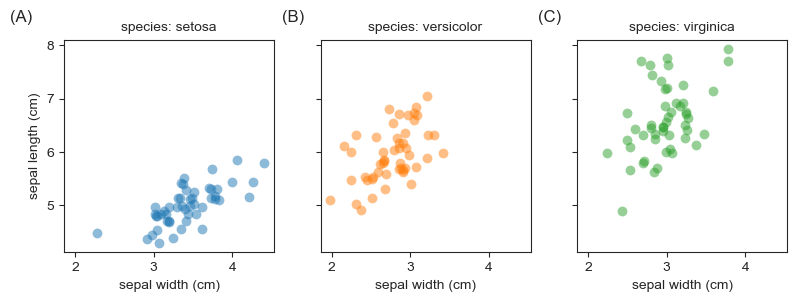

In [3]:
# Create a figure on which to draw this
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[8,3], sharey=True, sharex=True)

# Define colors for dots
colors = ['C0','C1','C2']

# Define the amount of jitter
sigma = .05

# Iterate over species
species = df['species'].unique()
for i, s in enumerate(species):
    
     # Get rows specific to species
    rows = df['species']==s

    # Extract lengths and widths
    lengths = df.loc[rows, 'sepal_length'].values
    widths = df.loc[rows, 'sepal_width'].values
    
    # Add jitter
    lengths_j = jitter(lengths, 0.05)
    widths_j = jitter(widths, 0.05)
    
    # Set ax
    ax = axs[i]
    
    # Draw points
    ax.scatter(x=widths_j,              
               y=lengths_j, 
               alpha=.5,             # Opacity   
               marker='o',           # Marker shape
               s=50,                 # Marker size
               color=colors[i],      # Marker color
               linewidths=0)         # Removes boundary from marker

    # Set the x and y labels
    ax.set_xlabel('sepal width (cm)', fontsize=10)
    
    if i==0:
        ax.set_ylabel('sepal length (cm)', fontsize=10)
    
    # Make a title
    ax.set_title('species: %s'%s, fontsize=10)
    
# Make sure labels don't get pushed off plot
plt.tight_layout(w_pad=3)

# Label panels
fig.text(x=.01, y=.99, s='(A)', horizontalalignment='left', verticalalignment='top', fontsize=12)
fig.text(x=.35, y=.99, s='(B)', horizontalalignment='left', verticalalignment='top', fontsize=12)
fig.text(x=.67, y=.99, s='(C)', horizontalalignment='left', verticalalignment='top', fontsize=12)

# Save figure
file_name = '6_matplotlib_4.pdf'
fig.savefig(file_name)